In [2]:
import tensorflow as tf
import tensorflow.keras.datasets.imdb as imdb
import os
import numpy as np
import json

In [3]:
with open('datasets/sarcasm.json','r',encoding='utf=8') as f:
    datastore=json.load(f)

In [4]:
datastore

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [39]:
sentences=[]
labels=[]
url=[]

for sentence in datastore:
    sentences.append(sentence['headline'])
    labels.append(sentence['is_sarcastic'])
    url.append(sentence['article_link'])

In [40]:
labels_final=np.asarray(labels)

In [3]:
training_size = 20000
vocal_size=10000
max_length=16
embedding_dim=16
trunc_type='post'
padding_type='post'
oov_tok='<OOV>'

In [59]:
training_sentences=sentences[0:training_size]
testing_sentences=sentences[training_size:]

training_labels=labels_final[0:training_size]
testing_labels=labels_final[training_size:]

In [60]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [61]:
tokenizer=Tokenizer(num_words=vocal_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index

training_sequences=tokenizer.texts_to_sequences(training_sentences)
training_padded=pad_sequences(training_sequences,maxlen=max_length,truncating=trunc_type,padding=padding_type)

testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequences,maxlen=max_length,truncating=trunc_type,padding=padding_type)

# building model

In [62]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocal_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 16, 16)            16000     
                                                                 
 flatten_5 (Flatten)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                2570      
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 18,581
Trainable params: 18,581
Non-trainable params: 0
_________________________________________________________________


In [63]:
num_epochs=10

history=model.fit(training_padded,training_labels,epochs=num_epochs,validation_data=(testing_padded,testing_labels))

Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 0.4777 - accuracy: 0.7567 - val_loss: 0.3730 - val_accuracy: 0.8264
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3271 - accuracy: 0.8536 - val_loss: 0.3605 - val_accuracy: 0.8334
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2883 - accuracy: 0.8721 - val_loss: 0.3693 - val_accuracy: 0.8326
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2594 - accuracy: 0.8872 - val_loss: 0.3838 - val_accuracy: 0.8302
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2322 - accuracy: 0.9020 - val_loss: 0.4108 - val_accuracy: 0.8161
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2085 - accuracy: 0.9140 - val_loss: 0.4405 - val_accuracy: 0.8100
Epoch 7/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1860 - accuracy: 0.9251 - val_loss: 0.4790 - val_accuracy: 0.8044
Epoch 

# visualize word embeddings 
https://projector.tensorflow.org/

In [64]:
import io

embedding_layer=model.layers[0]
embedding_weights=embedding_layer.get_weights()[0]
print(embedding_weights.shape)
reverse_word_index=tokenizer.index_word
out_v=io.open('datasets/sarcasm_vect.tsv','w',encoding='utf-8')
out_m=io.open('datasets/sarcasm_meta.tsv','w',encoding='utf-8')

for word_num in range(1, vocal_size):
    word_name=reverse_word_index[word_num]
    word_embedding=embedding_weights[word_num]
    out_m.write(word_name+'\n')
    out_v.write('\t'.join([str(x) for x in word_embedding])+'\n')
out_v.close()
out_m.close()

(1000, 16)


<Figure size 640x480 with 0 Axes>

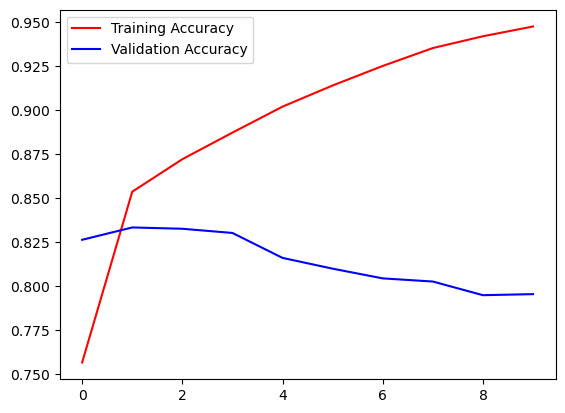

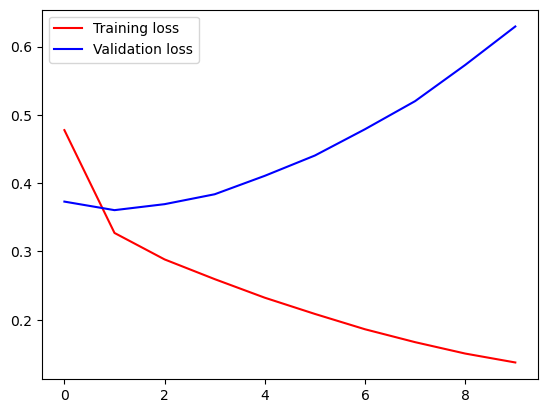

<Figure size 640x480 with 0 Axes>

In [65]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r' , label='Training Accuracy')
plt.plot(epochs, val_acc, 'b' , label='Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r' , label='Training loss')
plt.plot(epochs, val_loss, 'b' , label='Validation loss')
plt.legend()
plt.figure()

# CNN model

In [4]:
import tensorflow as tf

# Parameters
embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

# Model Definition with Conv1D
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocal_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_conv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 16)            160000    
                                                                 
 conv1d (Conv1D)             (None, 12, 128)           10368     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
__________________________________________________

In [5]:
NUM_EPOCHS = 10

# Train the model
history_conv = model_conv.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

NameError: name 'training_padded' is not defined